In [3]:
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 19.6 MB/s eta 0:00:00m eta 0:00:010:00:01


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [184]:
def showImage(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

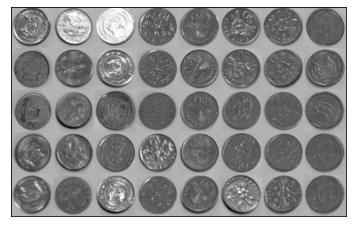

In [185]:
img = cv2.imread("./image/CoinRecognition_recognizedCoins.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
showImage(gray)

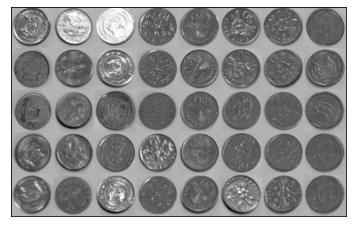

In [186]:
gray_blur = cv2.GaussianBlur(gray, (15,15), 0)
showImage(gray)

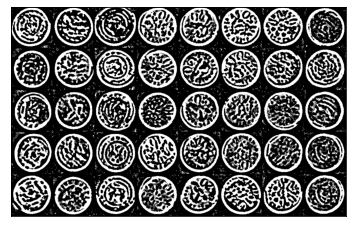

In [202]:
th = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,1)
showImage(th)

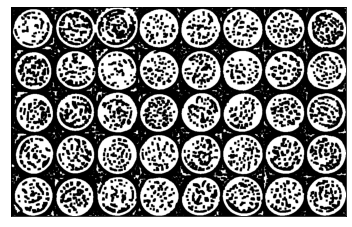

In [219]:
kernel = np.ones((2,2), np.uint8)
closing = cv2.morphologyEx(th, cv2.MORPH_CLOSE,kernel,iterations=5)
showImage(closing)

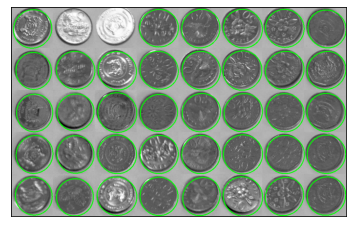

38


In [220]:
img = cv2.imread("./image/CoinRecognition_recognizedCoins.jpeg")

res_img = closing.copy()
ct, hierachy = cv2.findContours(res_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
count = 0
for cnt in ct:
    area = cv2.contourArea(cnt)
    if area < 1000 or area > 20000:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img, ellipse, (0,255,0), 2)
    count += 1
showImage(img)
print(count) # พลาดไป 2 coins